In [3]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
ncfile = Dataset("/data/wto/WPSOUT/met_em.d01.2020-06-01_00:00:00.nc", mode='r')
print(ncfile.variables.keys())

dict_keys(['Times', 'PRES', 'SOIL_LAYERS', 'SM', 'ST', 'SOILHGT', 'PSFC', 'PMSL', 'SNOWH', 'SNOW', 'SEAICE', 'ST100289', 'ST028100', 'ST007028', 'ST000007', 'SM100289', 'SM028100', 'SM007028', 'SM000007', 'SKINTEMP', 'SST', 'LANDSEA', 'VV', 'UU', 'RH', 'TT', 'SPECHUMD', 'GHT', 'SANDFRAC', 'CLAYFRAC', 'EROD', 'CANFRA', 'IMPERV', 'FRC_URB2D', 'URB_PARAM', 'LAKE_DEPTH', 'VAR_SSO', 'OL4', 'OL3', 'OL2', 'OL1', 'OA4', 'OA3', 'OA2', 'OA1', 'VAR', 'CON', 'SNOALB', 'LAI12M', 'GREENFRAC', 'ALBEDO12M', 'SCB_DOM', 'SOILCBOT', 'SCT_DOM', 'SOILCTOP', 'SOILTEMP', 'HGT_M', 'LU_INDEX', 'LANDUSEF', 'COSALPHA_V', 'SINALPHA_V', 'COSALPHA_U', 'SINALPHA_U', 'XLONG_C', 'XLAT_C', 'LANDMASK', 'COSALPHA', 'SINALPHA', 'F', 'E', 'MAPFAC_UY', 'MAPFAC_VY', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_VX', 'MAPFAC_MX', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_M', 'CLONG', 'CLAT', 'XLONG_U', 'XLAT_U', 'XLONG_V', 'XLAT_V', 'XLONG_M', 'XLAT_M'])


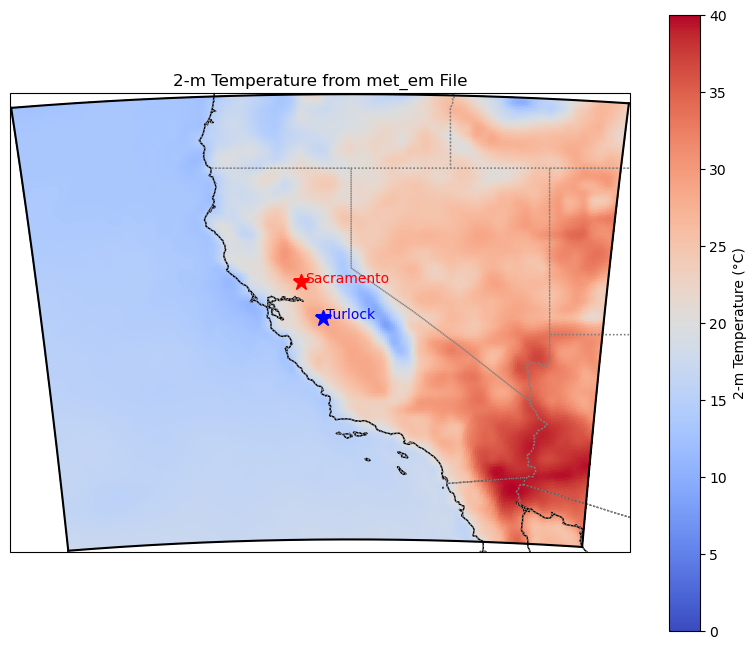

In [6]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the met_em NetCDF file
ncfile = Dataset("/data/wto/WPSOUT/met_em.d01.2020-06-01_00:00:00.nc", mode='r')

# Read lat/lon and 2-m temperature
lats = ncfile.variables['XLAT_M'][0, :, :]
lons = ncfile.variables['XLONG_M'][0, :, :]
t = ncfile.variables['TT'][0, 0, :, :] - 273.15

# Coordinates of Sacramento and Turlock
sacramento_lat, sacramento_lon = 38.5816, -121.4944
turlock_lat, turlock_lon = 37.4947, -120.8466

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

# Plot domain edges
ax.plot(lons[0, :], lats[0, :], 'k-')      # bottom
ax.plot(lons[-1, :], lats[-1, :], 'k-')    # top
ax.plot(lons[:, 0], lats[:, 0], 'k-')      # left
ax.plot(lons[:, -1], lats[:, -1], 'k-')    # right

# Plot the 2-meter temperature field
mesh = ax.pcolormesh(lons, lats, t, cmap='coolwarm', shading='auto', vmin=0, vmax=40)

# Add map features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')

# Add stars for Sacramento and Turlock
ax.plot(sacramento_lon, sacramento_lat, marker='*', color='red', markersize=12, label='Sacramento')
ax.plot(turlock_lon, turlock_lat, marker='*', color='blue', markersize=12, label='Turlock')

# Add labels
ax.text(sacramento_lon + 0.1, sacramento_lat, "Sacramento", fontsize=10, color='red')
ax.text(turlock_lon + 0.1, turlock_lat, "Turlock", fontsize=10, color='blue')

# Colorbar and title
plt.colorbar(mesh, ax=ax, label='2-m Temperature (°C)')
ax.set_title('2-m Temperature from met_em File')

plt.show()


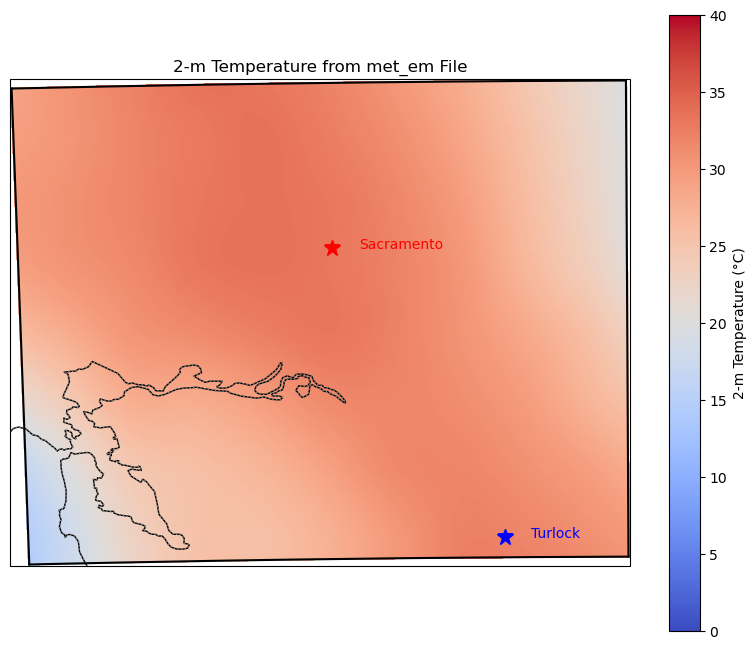

In [5]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the met_em NetCDF file
ncfile = Dataset("/data/wto/WPSOUT/met_em.d02.2020-06-30_00:00:00.nc", mode='r')

# Read lat/lon and 2-m temperature
lats = ncfile.variables['XLAT_M'][0, :, :]
lons = ncfile.variables['XLONG_M'][0, :, :]
t = ncfile.variables['TT'][0, 0, :, :] - 273.15

# Coordinates of Sacramento and Turlock
sacramento_lat, sacramento_lon = 38.5816, -121.4944
turlock_lat, turlock_lon = 37.4947, -120.8466

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

# Plot domain edges
ax.plot(lons[0, :], lats[0, :], 'k-')      # bottom
ax.plot(lons[-1, :], lats[-1, :], 'k-')    # top
ax.plot(lons[:, 0], lats[:, 0], 'k-')      # left
ax.plot(lons[:, -1], lats[:, -1], 'k-')    # right

# Plot the 2-meter temperature field
mesh = ax.pcolormesh(lons, lats, t, cmap='coolwarm', shading='auto', vmin=0, vmax=40)

# Add map features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')

# Add stars for Sacramento and Turlock
ax.plot(sacramento_lon, sacramento_lat, marker='*', color='red', markersize=12, label='Sacramento')
ax.plot(turlock_lon, turlock_lat, marker='*', color='blue', markersize=12, label='Turlock')

# Add labels
ax.text(sacramento_lon + 0.1, sacramento_lat, "Sacramento", fontsize=10, color='red')
ax.text(turlock_lon + 0.1, turlock_lat, "Turlock", fontsize=10, color='blue')

# Colorbar and title
plt.colorbar(mesh, ax=ax, label='2-m Temperature (°C)')
ax.set_title('2-m Temperature from met_em File')

plt.show()
